# Physics 715 -  Assignment 5
## Bryan Luu

### Problem 5.2 - Monte Carlo simulation

In [1]:
import numpy as np
import random
import time
import math
import matplotlib.pyplot as plt

seed = 0
# seed = time.time() # Uncomment for random conditions
random.seed(seed)

In [20]:
# Setup
N = 40000 # size of system

# initialize spins as all down
last = -1*np.ones(N, np.int) # previous state's spins
new = -1*np.ones(N, np.int) # new state's spins

J = 4.0 # given in problem statement
k = 1 # Boltzmann's constant (set to 1)
startT = 0.05 # initial conditions
endT = 7.0 # end condition
step = 0.05 # temperature step
m = -N # sum of all spins

T = np.arange(startT, endT, step) # temperatures
loops = int((endT-startT)/step) # number of MC loops
Mbar = -1*np.ones(loops) # average magnetization
E = J*N*np.ones(loops) # energy of system

In [21]:
# MC loop
for t in range(1, loops): # index over time steps
    E[t] = E[t-1] # copy energy from last step
    dE = -2*J*m/N # energy change for a flip from down to up
    dm = 0 # change in the spin sum
    for i in range(N):
        if(last[i] == 1): # if spin is up
            new[i] = -1 # flip spin to down
            dm -= 2 # reduce spin sum by 2 (remove 1 up, add 1 down)
            E[t] -= dE # decrease energy by one flip's amount
        else:
            r = random.random() # generate random float between 0 and 1
            if(r < math.exp(-dE/(k*T[t]))):
                new[i] = 1 # flip spin to up
                dm += 2 # increase spin sum by 2 (remove 1 down, add 1 up)
                E[t] += dE # increase energy by one flip's amount

    # once equilibrium has been established
    last = np.copy(new) # update spins
    m += dm # adjust spin sum
    Mbar[t] = m/N # calculate average magnetization
# end loop  

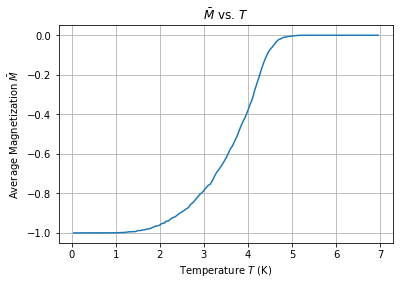

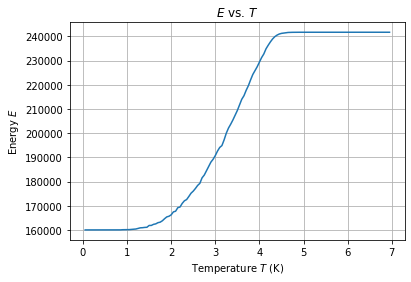

In [22]:
plt.figure()
plt.plot(T, Mbar)
plt.title(r"$\bar{M}$ vs. $T$")
plt.xlabel("Temperature $T$ (K)")
plt.ylabel(r"Average Magnetization $\bar{M}$")
plt.grid("on")

plt.figure()
plt.plot(T, E)
plt.title("$E$ vs. $T$")
plt.xlabel("Temperature $T$ (K)")
plt.ylabel("Energy $E$")
plt.grid("on")